In [ ]:
# load analytics.csv in dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the csv file
df = pd.read_csv('analytics.csv')


In [5]:
# Create a new data frame, where it only includes a single sample of each type of event. The event is the "type" column.
df_unique = df.drop_duplicates(subset=["type"])
df_unique


,id,type,url,payload,user_id,session_id,received_at,created_at,domain
0,16926,time-spent,www.amazon.com/Amazon-Brand-Decorative-Decorat...,"{""duration"":738}",98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,b1d23a46-7793-48b7-bfef-02d2bf61309c,2025-03-14T00:03:23.770546+00:00,2025-03-14T00:03:18.47+00:00,amazon.com
2,16928,uninstall,www.lessextension.com/goodbye,NaN,98ec858e-c25a-4c2a-a588-cfe9cf8a1fb9,none,2025-03-14T00:03:34.022325+00:00,2025-03-14T00:03:29.737+00:00,lessextension.com
3,16944,on-onboarding,www.lessextension.com/onboarding,NaN,none,none,2025-03-14T16:00:23.615042+00:00,2025-03-14T16:00:22.709+00:00,lessextension.com
10,16955,active,kcgblchgejkpnemehaojecgbamdiacml/popup.html,true,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:49:42.544898+00:00,2025-03-15T11:49:41.641+00:00,kcgblchgejkpnemehaojecgbamdiacml
12,16957,page-view,www.zalando.dk/herrer-home/,NaN,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:50:03.509868+00:00,2025-03-15T11:50:03.026+00:00,zalando.dk
22,16967,add-to-cart,www.zalando.dk/pier-one-fleecetroejer-pine-gro...,NaN,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:50:12.717857+00:00,2025-03-15T11:50:12.331+00:00,zalando.dk
26,17191,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,none,2025-03-17T13:20:50.209908+00:00,2025-03-17T13:20:49.723+00:00,lessextension.com
29,17194,from-directs-cta,www.lessextension.com/,"""chrome_extension""",less-website,none,2025-03-17T13:41:45.949022+00:00,2025-03-17T13:41:45.307+00:00,lessextension.com
81,16979,cancel,www.zalando.dk/checkout/confirm,NaN,4dd84d7b-578b-4c4a-9ddd-b99c02515df7,54cffff4-f3e4-45f6-945d-0dccff44a05a,2025-03-15T11:50:32.309562+00:00,2025-03-15T11:50:31.932+00:00,zalando.dk
88,16986,open-popup,kcgblchgejkpnemehaojecgbamdiacml/popup.html,NaN,ffeed042-eeab-47b4-b58b-c26d9c1fae3e,3b906e20-2bba-4ddc-b5f4-1c2881187f85,2025-03-16T08:53:08.700911+00:00,2025-03-16T08:53:08.335+00:00,kcgblchgejkpnemehaojecgbamdiacml


In [6]:
# count different types of events
event_counts = df["type"].value_counts()
print(event_counts)

type
time-spent                    9004
page-view                      900
from-directs                   494
on-onboarding                  264
from-directs-cta                87
open-popup                      62
add-to-cart                     45
uninstall                       34
active                          28
welcome-modal-seen              28
enforce_wait_modal_shown        21
enforce_wait_info_expanded      10
enforce_wait_canceled            9
open-options                     5
place-order                      5
questionary-popup                4
cancel                           1
Name: count, dtype: int64


In [38]:
import re

# Count unique user IDs
# Define a regex pattern for UUIDv4
uuidv4_pattern = re.compile(r'^[a-f0-9]{8}-[a-f0-9]{4}-4[a-f0-9]{3}-[89ab][a-f0-9]{3}-[a-f0-9]{12}$', re.IGNORECASE)

# Filter user_id's that match the UUIDv4 pattern
uuidv4 = df[df["user_id"].apply(lambda x: bool(uuidv4_pattern.match(x)))]
unique_users = uuidv4["user_id"].nunique()

uninstalled = df[df["type"] == "uninstall"]
unique_uninstalled = uninstalled["user_id"].nunique()
unique_installed = unique_users - unique_uninstalled

# look at the last active event for each unique user. If the last event has a payload of "false", this means they've deactivated it.
# I'd like to know how many of the current installed users have deactivated the extension.
last_active = df[df["type"] == "active"]
last_active = last_active.drop_duplicates(subset=["user_id"], keep="last")
last_active = last_active[last_active["payload"] == "false"]
deactivated_but_not_uninstalled = len(last_active[~last_active["user_id"].isin(uninstalled["user_id"].values)])
totally_active = unique_installed - deactivated_but_not_uninstalled
on_onboarding = df[(df["type"] == "on-onboarding") & (df["payload"].apply(lambda x: x != '""'))]

print("Installations:", len(on_onboarding), "\nUser activity seen from", unique_users, "\nuninstalled:", unique_uninstalled, "\ndeactivated:", deactivated_but_not_uninstalled, "\nTotal registered active users:", totally_active)


Installations: 58 
User activity seen from 73 
uninstalled: 34 
deactivated: 5 
Total registered active users: 34


In [39]:
# group by session_id
# remove any rows that have a null session_id.
df_only_with_session = df[df["session_id"] != "none"]


In [40]:
# 1. Filter out all events that do not have sessions (already done above)
print(f"Total rows in dataset: {len(df)}")
print(f"Rows with valid session_id: {len(df_only_with_session)}")
print(f"Percentage of events with session: {len(df_only_with_session) / len(df) * 100:.2f}%")

""" 
# Create a pie chart of session event counts
plt.figure(figsize=(10, 7))
event_counts_categories = pd.cut(events_per_session, 
                                 bins=[0, 1, 2, 3, 4, np.inf], 
                                 labels=['1', '2', '3', '4', '5+'])
event_counts_distribution = event_counts_categories.value_counts().sort_index()
plt.pie(event_counts_distribution, 
        labels=event_counts_distribution.index,
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Distribution of Events per Session')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show() """


# 2. Count the number of unique sessions
unique_sessions = df_only_with_session["session_id"].nunique()
print(f"\nTotal number of unique sessions: {unique_sessions}")

# Convert created_at to datetime
# Convert created_at to datetime, handling mixed formats
df_only_with_session['created_at'] = pd.to_datetime(df_only_with_session['created_at'], format='mixed', errors='coerce')

# Group by session_id and find first and last event timestamps
session_lengths = df_only_with_session.groupby('session_id').agg({
    'created_at': ['min', 'max']
})

# Flatten the multi-index columns
session_lengths.columns = ['start_time', 'end_time']

# Calculate session duration in seconds
session_lengths['duration_seconds'] = (session_lengths['end_time'] - session_lengths['start_time']).dt.total_seconds()
session_lengths['duration_minutes'] = session_lengths['duration_seconds'] / 60

# Calculate average session length
avg_session_length_minutes = session_lengths['duration_minutes'].mean()
median_session_length_minutes = session_lengths['duration_minutes'].median()
print(f"\nAverage session length: {avg_session_length_minutes:.2f} minutes")
print(f"Median session length: {median_session_length_minutes:.2f} minutes")

# Count events per session
events_per_session = df_only_with_session.groupby('session_id').size()
avg_events_per_session = events_per_session.mean()
print(f"\nAverage events per session: {avg_events_per_session:.2f}")

Total rows in dataset: 11001
Rows with valid session_id: 10122
Percentage of events with session: 92.01%

Total number of unique sessions: 429

Average session length: 1.28 minutes
Median session length: 0.08 minutes

Average events per session: 23.59


/var/folders/yv/xt28csc14lq6qntd89nbqmfm0000gn/T/ipykernel_87245/4033538957.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_with_session['created_at'] = pd.to_datetime(df_only_with_session['created_at'], format='mixed', errors='coerce')


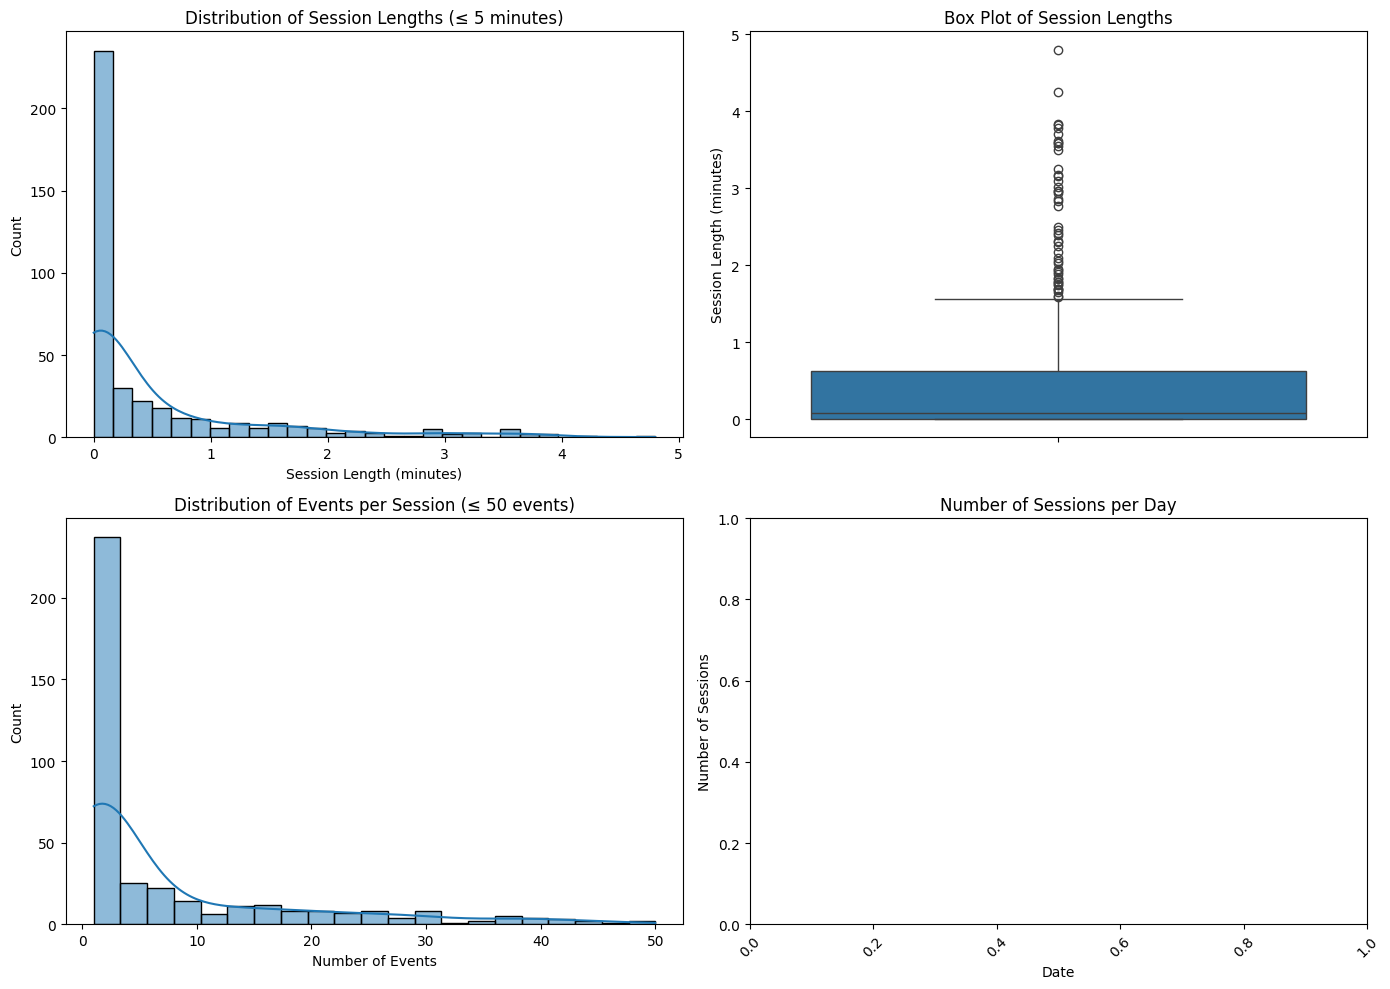

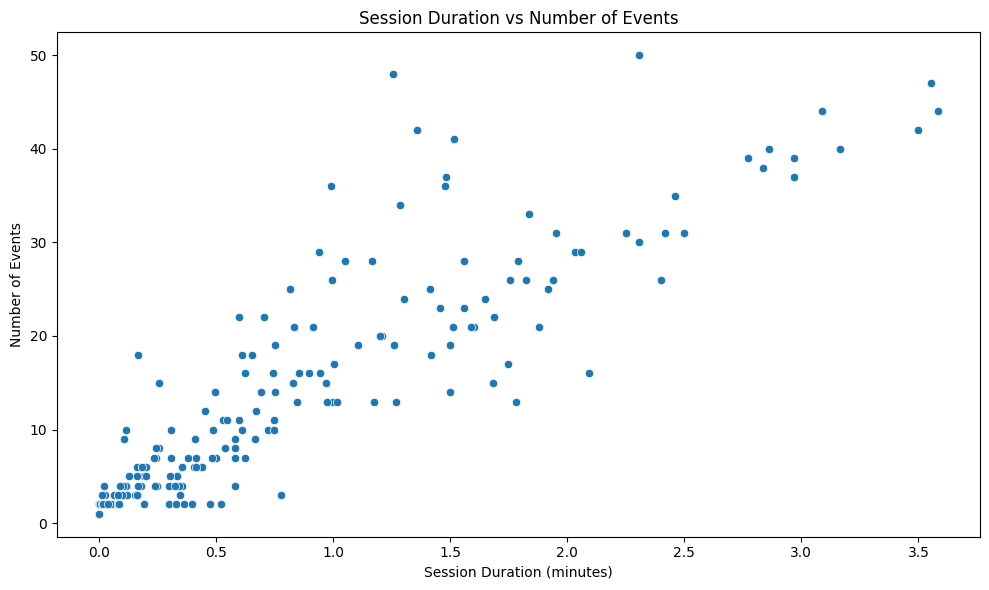

In [43]:

# 4. Create visualizations
plt.figure(figsize=(14, 10))

# Distribution of session lengths (in minutes)
plt.subplot(2, 2, 1)
# Filter out sessions longer than 60 minutes for better visualization
filtered_session_lengths = session_lengths[session_lengths['duration_minutes'] <= 5]
sns.histplot(filtered_session_lengths['duration_minutes'], kde=True)
plt.title('Distribution of Session Lengths (≤ 5 minutes)')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Count')

# Box plot of session lengths
plt.subplot(2, 2, 2)
sns.boxplot(y=filtered_session_lengths['duration_minutes'])
plt.title('Box Plot of Session Lengths')
plt.ylabel('Session Length (minutes)')

# Events per session distribution
plt.subplot(2, 2, 3)
sns.histplot(events_per_session[events_per_session <= 50], kde=True)  # Filtering for better visualization
plt.title('Distribution of Events per Session (≤ 50 events)')
plt.xlabel('Number of Events')
plt.ylabel('Count')

# Session activity over time
plt.subplot(2, 2, 4)
sessions_per_day = pd.Series(session_lengths.index).groupby(
    [pd.to_datetime(session_lengths['start_time']).dt.date]
).count()
sns.lineplot(x=sessions_per_day.index, y=sessions_per_day.values)
plt.title('Number of Sessions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional visualization: Scatter plot of session duration vs number of events
plt.figure(figsize=(10, 6))
session_events_count = df_only_with_session.groupby('session_id').size().reset_index(name='event_count')
session_data = pd.merge(session_lengths.reset_index(), session_events_count, on='session_id')

# Filter for better visualization
filtered_session_data = session_data[
    (session_data['duration_minutes'] <= 60) & 
    (session_data['event_count'] <= 50)
]

sns.scatterplot(data=filtered_session_data, x='duration_minutes', y='event_count')
plt.title('Session Duration vs Number of Events')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

In [ ]:
events_per_session[events_per_session <= 50].value_counts()

390

In [42]:
# Create a more detailed session analysis
# Find the top event types per session

# Create a DataFrame with session details
session_details = pd.DataFrame({
    'session_id': session_lengths.index,
    'start_time': session_lengths['start_time'],
    'end_time': session_lengths['end_time'],
    'duration_minutes': session_lengths['duration_minutes'],
    'num_events': events_per_session.values
})

# Event type distribution within sessions
event_types_per_session = df_only_with_session.groupby(['session_id', 'type']).size().reset_index(name='count')
top_event_types = event_types_per_session.groupby('session_id').apply(lambda x: 
    x.nlargest(1, 'count')['type'].values[0] if len(x) > 0 else None).reset_index()
top_event_types.columns = ['session_id', 'top_event_type']

# Merge with session details
session_details = pd.merge(session_details, top_event_types, on='session_id', how='left')

# Display session statistics by top event type
event_type_stats = session_details.groupby('top_event_type').agg({
    'session_id': 'count',
    'duration_minutes': ['mean', 'median'],
    'num_events': ['mean', 'median']
}).sort_values(('session_id', 'count'), ascending=False)

# Flatten the multi-index columns
event_type_stats.columns = [f'{col[0]}_{col[1]}' for col in event_type_stats.columns]
event_type_stats = event_type_stats.reset_index()
event_type_stats = event_type_stats.rename(columns={'session_id_count': 'num_sessions'})

print("Session statistics by dominant event type:")
print(event_type_stats)

# Plot the results
plt.figure(figsize=(12, 8))

# Number of sessions per top event type
plt.subplot(2, 1, 1)
sns.barplot(data=event_type_stats.head(10), x='top_event_type', y='num_sessions')
plt.title('Number of Sessions by Dominant Event Type')
plt.xlabel('Dominant Event Type')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45, ha='right')

# Average duration per top event type
plt.subplot(2, 1, 2)
sns.barplot(data=event_type_stats.head(10), x='top_event_type', y='duration_minutes_mean')
plt.title('Average Session Duration by Dominant Event Type')
plt.xlabel('Dominant Event Type')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

ValueError: 'session_id' is both an index level and a column label, which is ambiguous.

In [ ]:
# Interactive session inspection with pandas display
# Let's create a function to see sessions by duration or event count

def display_sessions_by_criteria(criteria='duration', top_n=10, ascending=False):
    """
    Display sessions sorted by a specific criteria
    
    Args:
        criteria: 'duration' or 'events' to sort by duration or event count
        top_n: number of sessions to display
        ascending: sort order (default: descending)
    """
    # Merge session details with user IDs for reference
    session_user_info = df_only_with_session[['session_id', 'user_id']].drop_duplicates()
    full_session_details = pd.merge(session_details, session_user_info, on='session_id')
    
    # Display only one user_id per session
    full_session_details = full_session_details.drop_duplicates(subset=['session_id'])
    
    if criteria == 'duration':
        result = full_session_details.sort_values('duration_minutes', ascending=ascending).head(top_n)
    else:  # events count
        result = full_session_details.sort_values('num_events', ascending=ascending).head(top_n)
    
    # Format datetime columns for better readability
    result['start_time'] = result['start_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    result['end_time'] = result['end_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    return result

# Display the top 10 longest sessions
print("Top 10 longest sessions:")
longest_sessions = display_sessions_by_criteria('duration', 10, False)
longest_sessions

In [ ]:
# Display sessions with the most events
print("Top 10 sessions with most events:")
most_active_sessions = display_sessions_by_criteria('events', 10, False)
most_active_sessions

In [ ]:
# Let's analyze user behavior across multiple sessions

# Calculate statistics for users with multiple sessions
users_with_sessions = df_only_with_session.groupby('user_id')['session_id'].nunique().reset_index()
users_with_sessions.columns = ['user_id', 'num_sessions']

# Get users with more than one session
multi_session_users = users_with_sessions[users_with_sessions['num_sessions'] > 1]
print(f"Number of users with multiple sessions: {len(multi_session_users)}")
print(f"Average number of sessions per user: {users_with_sessions['num_sessions'].mean():.2f}")

# Create a histogram of sessions per user
plt.figure(figsize=(10, 6))
sns.histplot(users_with_sessions['num_sessions'], kde=True, bins=20)
plt.title('Distribution of Session Count per User')
plt.xlabel('Number of Sessions')
plt.ylabel('Count of Users')
plt.show()

# For users with multiple sessions, calculate average time between sessions
user_sessions = df_only_with_session.groupby(['user_id', 'session_id'])['created_at'].min().reset_index()
user_sessions = user_sessions.sort_values(['user_id', 'created_at'])

# Calculate time between consecutive sessions for each user
def calculate_time_between_sessions(group):
    if len(group) <= 1:
        return pd.Series({'time_to_next_session': pd.NaT})
    
    time_diffs = []
    for i in range(len(group) - 1):
        time_diff = (group['created_at'].iloc[i+1] - group['created_at'].iloc[i]).total_seconds() / 3600  # in hours
        time_diffs.append(time_diff)
    
    # Add NaN for the last session
    time_diffs.append(np.nan)
    return pd.Series({'time_to_next_session': time_diffs})

time_between_sessions = user_sessions.groupby('user_id').apply(
    lambda x: calculate_time_between_sessions(x)
)

# Flatten the results
time_diffs_flat = [t for sublist in time_between_sessions['time_to_next_session'] for t in sublist if not pd.isna(t)]

# Visualize time between sessions (in hours)
plt.figure(figsize=(10, 6))
sns.histplot(np.clip(time_diffs_flat, 0, 72), kde=True, bins=30)  # Clip to 3 days for better visualization
plt.title('Distribution of Time Between User Sessions (Up to 72 hours)')
plt.xlabel('Time Between Sessions (hours)')
plt.ylabel('Count')
plt.show()

print(f"Average time between sessions: {np.mean(time_diffs_flat):.2f} hours")
print(f"Median time between sessions: {np.median(time_diffs_flat):.2f} hours")

In [ ]:
# Interactive data exploration - display DataFrame in an Excel-like view
from IPython.display import display

# Function to display a subset of the DataFrame with useful columns
def explore_data(df, max_rows=50):
    """
    Display a subset of the DataFrame with important columns for exploration
    """
    # Select useful columns
    display_cols = ['user_id', 'session_id', 'type', 'url', 'domain', 'created_at', 'payload']
    display_df = df[display_cols].copy()
    
    # Convert timestamp to datetime for better readability
    display_df['created_at'] = pd.to_datetime(display_df['created_at'])
    
    # Display a subset of rows
    return display_df.head(max_rows)

# Use this to explore the data
session_data_view = explore_data(df_only_with_session, 100)
session_data_view